Pontificia Universidad Católica de Chile

Escuela de Ingeniería

Departamento de Ingeniería Eléctrica

IEE3936 - Estimación y Control Óptimo en Robótica

<p align="center">
  Tarea 4: Control Óptimo
  <br>
  11 de julio 10:00 hrs
  <br>
  Diego Muñoz Rojas y Martín Pincheira Morales
</p>

In [25]:
import json
from funciones import *
from params_vehiculo import *

# PID
# cargar datos desde el archivo JSON
with open('listas_datos_pid.json', 'r') as file:
    datos = json.load(file)

# cargar datos
lista_tiempo_pid = np.array(datos['Lista1'])
lista_senal_control_pid = np.array(datos['Lista2'])
lista_ref_x_pid = np.array(datos['Lista3'])
lista_ref_y_pid = np.array(datos['Lista4'])
lista_ref_a_pid = np.array(datos['Lista5'])
lista_err_x_pid = np.array(datos['Lista6'])
lista_err_y_pid = np.array(datos['Lista7'])
lista_err_a_pid = np.array(datos['Lista8'])
lista_estado_x_pid = np.array(datos['Lista9'])
lista_estado_y_pid = np.array(datos['Lista10'])
lista_estado_a_pid = np.array(datos['Lista11'])
lista_estado_v_pid = np.array(datos['Lista12'])
lista_estado_w_pid = np.array(datos['Lista13'])
lista_estado_pid = np.array([lista_estado_x_pid, lista_estado_y_pid, lista_estado_a_pid, lista_estado_v_pid, lista_estado_w_pid])
# metrica de desempeño
calcular_ITAE_x_pid = calcular_ITAE(lista_err_x_pid)
calcular_ITAE_y_pid = calcular_ITAE(lista_err_y_pid)
calcular_ITAE_a_pid = calcular_ITAE(lista_err_a_pid)

# LQI
# cargar datos desde el archivo JSON
with open('listas_datos_lqi.json', 'r') as file:
    datos = json.load(file)

# cargar datos
lista_tiempo_lqi = np.array(datos['Lista1'])
lista_senal_control_lqi = np.array(datos['Lista2'])
lista_ref_x_lqi = np.array(datos['Lista3'])
lista_ref_y_lqi = np.array(datos['Lista4'])
lista_ref_a_lqi = np.array(datos['Lista5'])
lista_err_x_lqi = np.array(datos['Lista6'])
lista_err_y_lqi = np.array(datos['Lista7'])
lista_err_a_lqi = np.array(datos['Lista8'])
lista_estado_x_lqi = np.array(datos['Lista9'])
lista_estado_y_lqi = np.array(datos['Lista10'])
lista_estado_a_lqi = np.array(datos['Lista11'])
lista_estado_v_lqi = np.array(datos['Lista12'])
lista_estado_w_lqi = np.array(datos['Lista13'])
lista_estado_int_err_x_lqi = np.array(datos['Lista14'])
lista_estado_int_err_y_lqi = np.array(datos['Lista15'])
lista_estado_int_err_a_lqi = np.array(datos['Lista16'])
lista_estado_lqi = np.array([lista_estado_x_lqi, lista_estado_y_lqi, lista_estado_a_lqi, lista_estado_v_lqi, lista_estado_w_lqi, lista_estado_int_err_x_lqi, lista_estado_int_err_y_lqi, lista_estado_int_err_a_lqi])
# metrica de desempeño
calcular_ITAE_x_lqi = calcular_ITAE(lista_err_x_lqi)
calcular_ITAE_y_lqi = calcular_ITAE(lista_err_y_lqi)
calcular_ITAE_a_lqi = calcular_ITAE(lista_err_a_lqi)
# funcion objetivo
valores_fo_lqi = []
for i in range(len(lista_estado_x_lqi)):
    lista_j_lqi = funcion_objetivo(lista_estado_lqi[:,i], lista_senal_control_lqi[:][i], Q_lqr, R_lqr)
    valores_fo_lqi.append(lista_j_lqi)
lista_jtime_lqi = funcion_objetivo_tiempo(valores_fo_lqi)


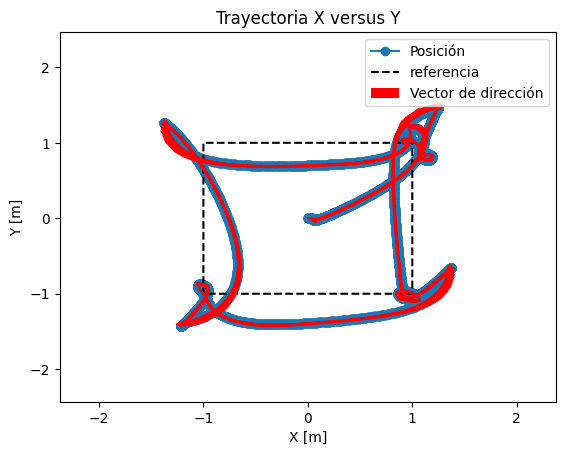

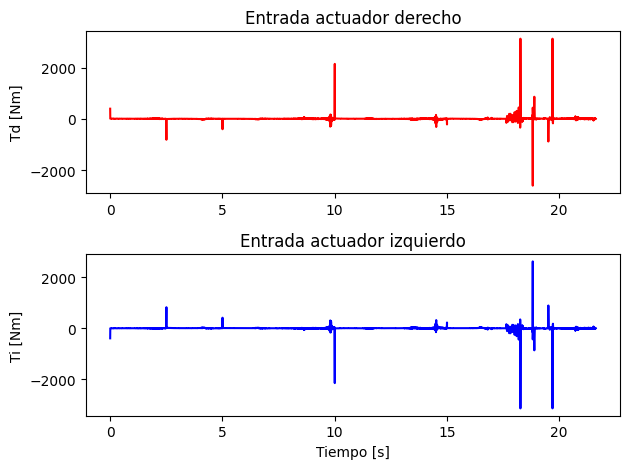

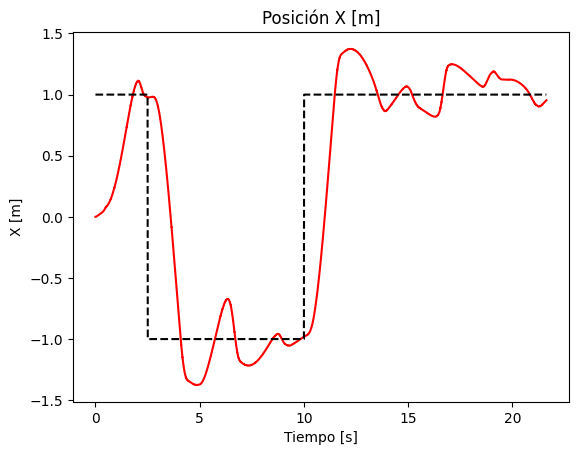

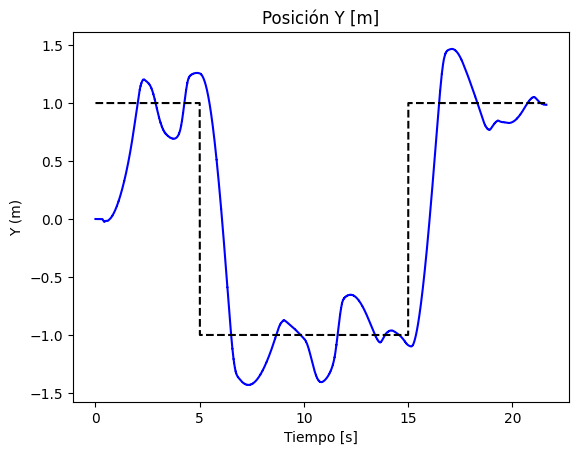

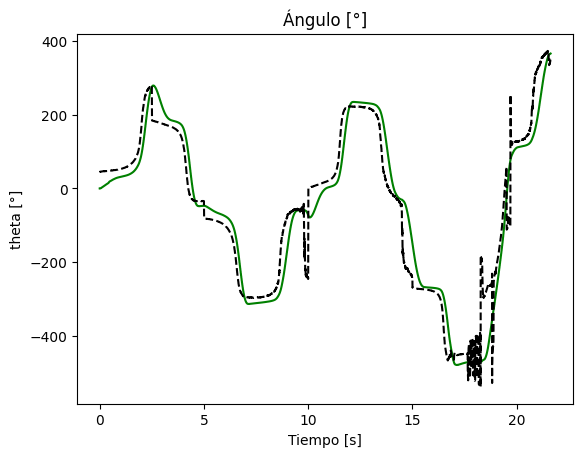

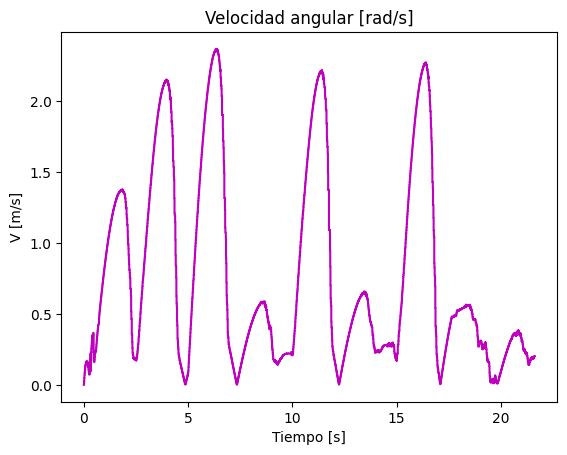

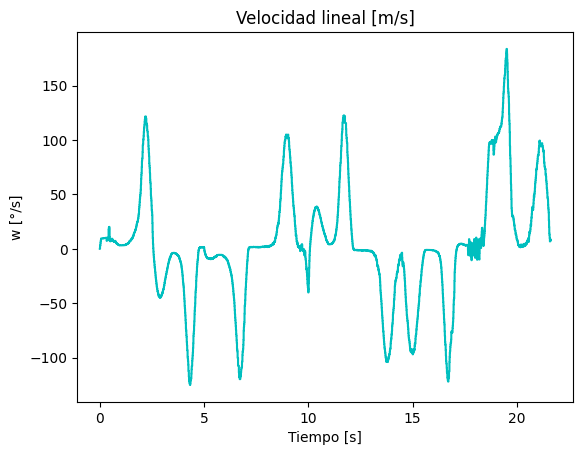

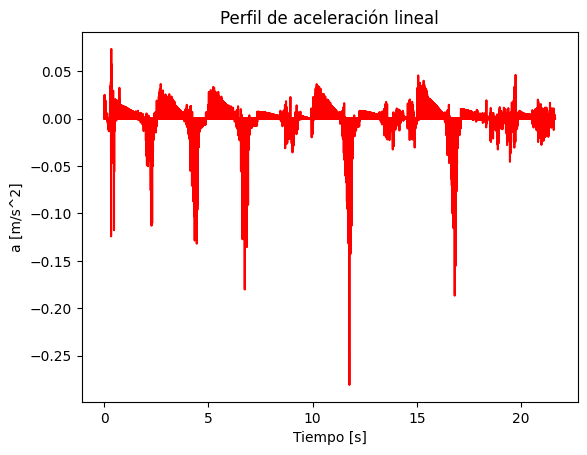

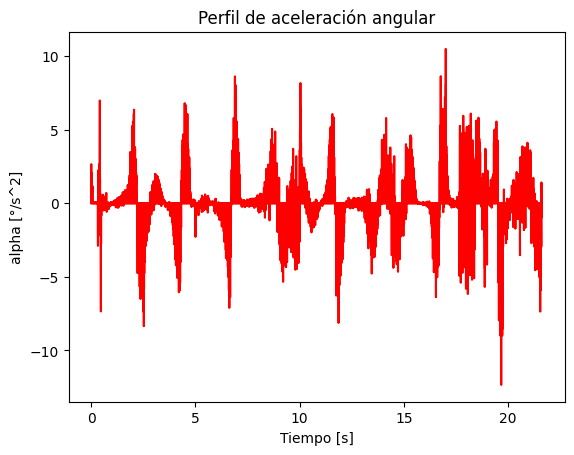

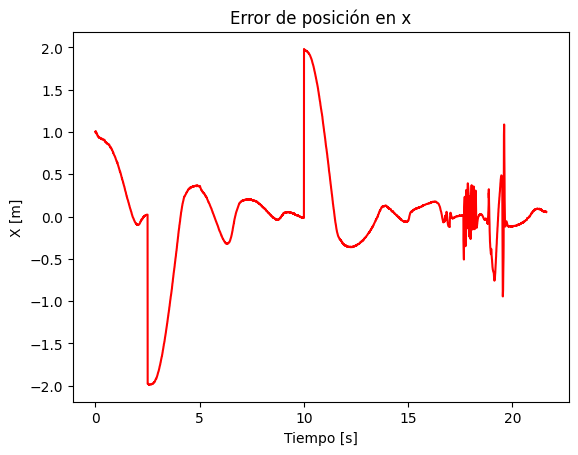

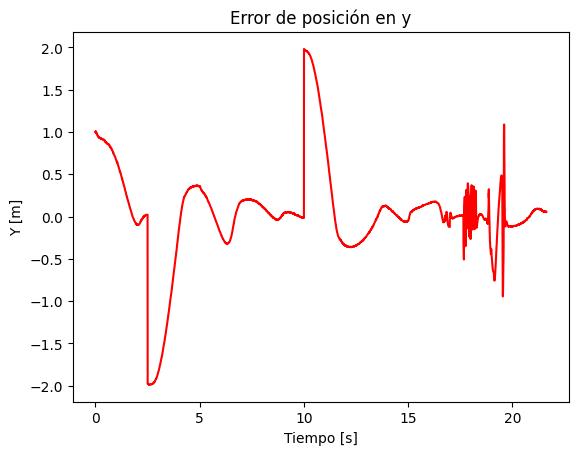

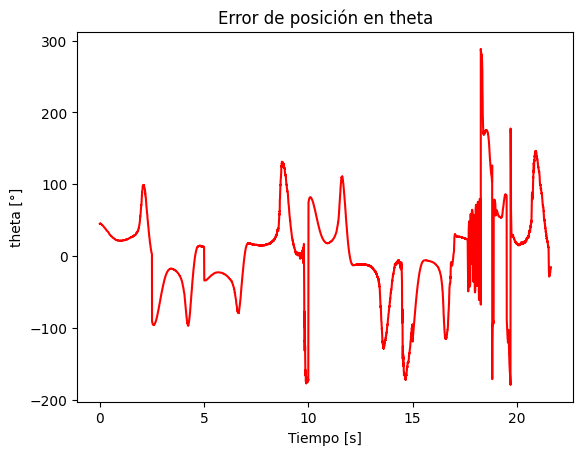

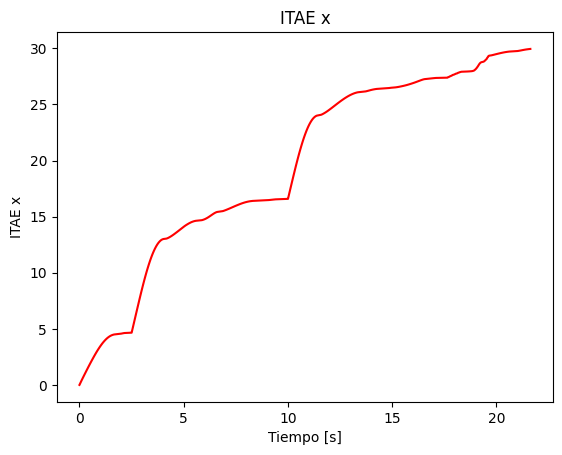

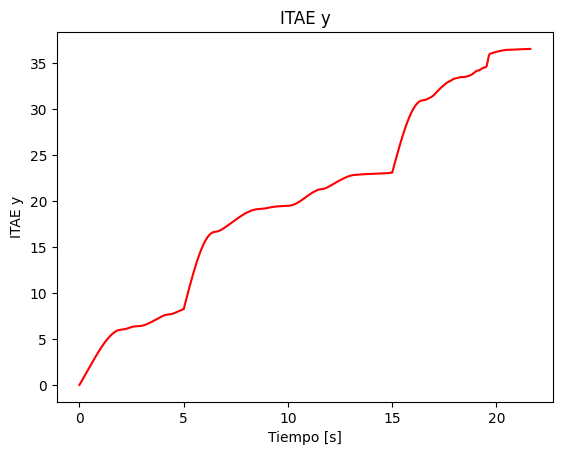

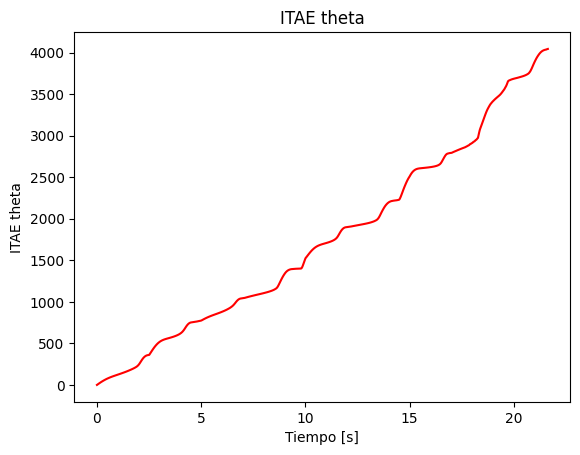

Tiempo de respuesta al 10%: [1.9300000000000015, None, 3.4749999999998646, 3.344999999999761] segundos
Tiempo de establecimiento al 5%: No se establece en tiempo determinado, tiene una respuesta oscilatoria


In [26]:
grafico_xy_orientacion(lista_estado_x_pid, lista_estado_y_pid, lista_ref_x_pid, lista_ref_y_pid)
grafico_torques_entrada(lista_tiempo_pid, lista_senal_control_pid)
grafico_estado(lista_tiempo_pid, lista_estado_pid, lista_ref_x_pid, lista_ref_y_pid, lista_ref_a_pid)
grafico_aceleracion(lista_tiempo_pid, lista_estado_pid)
grafico_error(lista_tiempo_pid, lista_err_x_pid, lista_err_x_pid, lista_err_a_pid)
grafico_simple(lista_tiempo_pid, calcular_ITAE_x_pid, 'Tiempo [s]', 'ITAE x', 'ITAE x')
grafico_simple(lista_tiempo_pid, calcular_ITAE_y_pid, 'Tiempo [s]', 'ITAE y', 'ITAE y')
grafico_simple(lista_tiempo_pid, calcular_ITAE_a_pid*180/np.pi, 'Tiempo [s]', 'ITAE theta', 'ITAE theta')
print('Tiempo de respuesta al 10%:', tiempo_respuesta(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, lista_ref_x_pid, lista_ref_y_pid, lista_ref_a_pid, tolerancia=0.1), 'segundos')
print('Tiempo de establecimiento al 5%:', tiempo_establecimiento(lista_tiempo_pid, lista_err_x_pid, lista_err_y_pid, lista_err_a_pid, tolerancia=0.05))

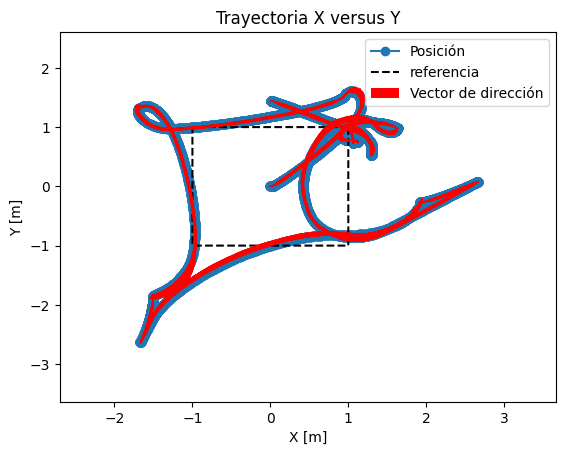

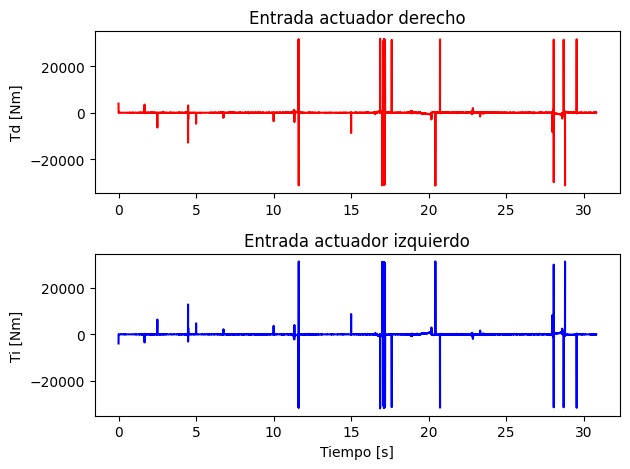

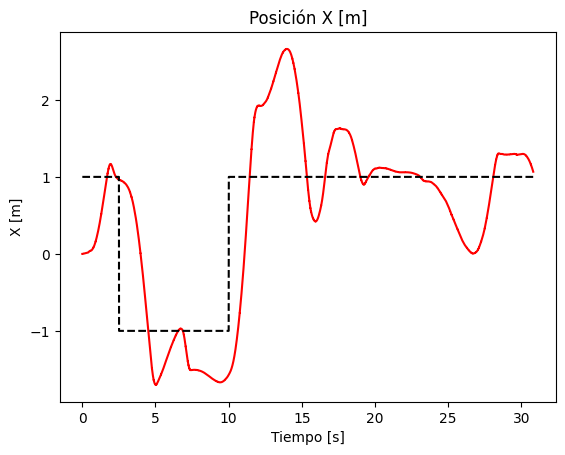

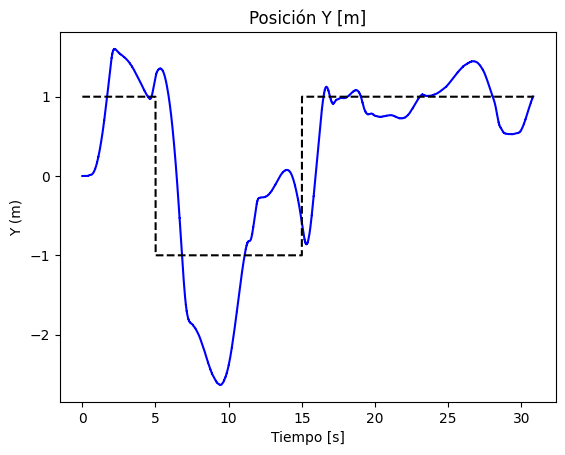

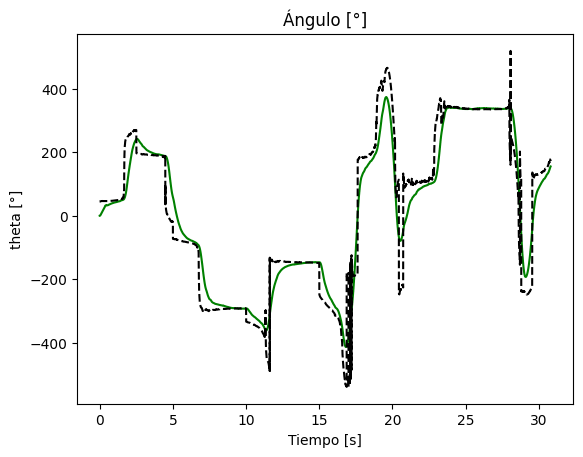

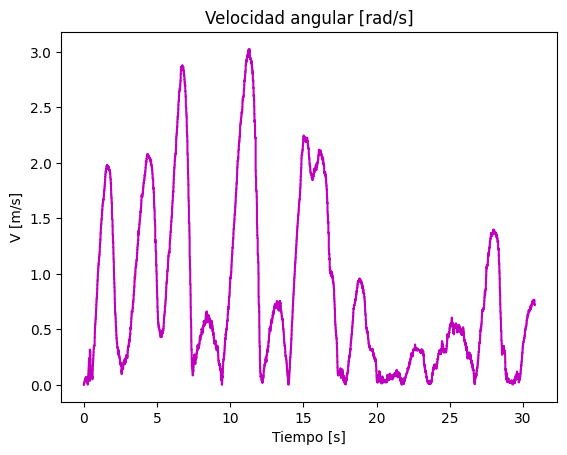

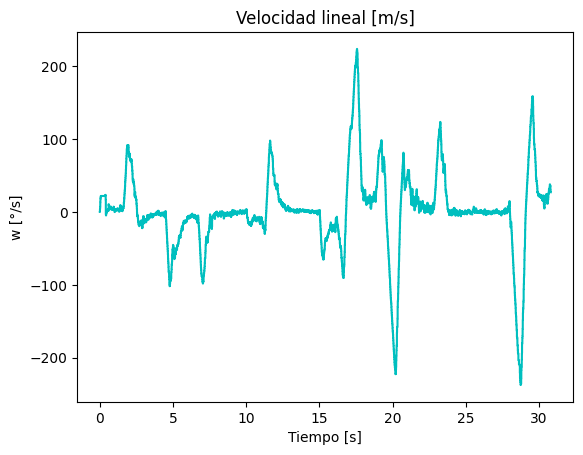

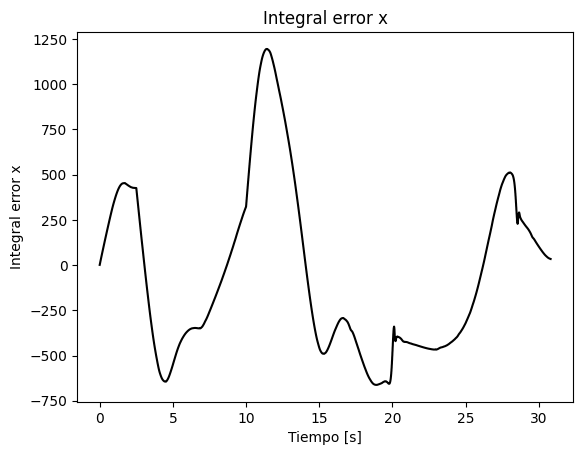

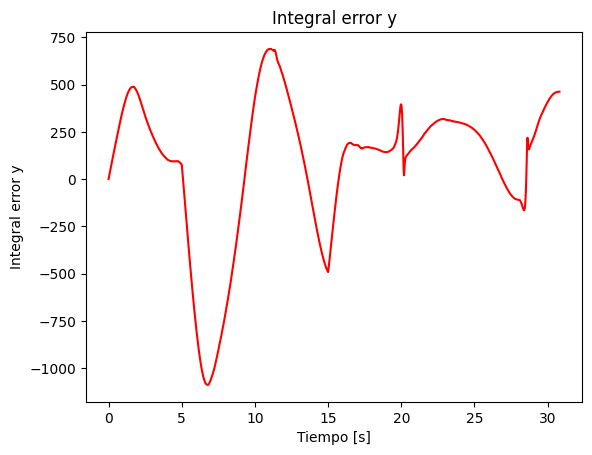

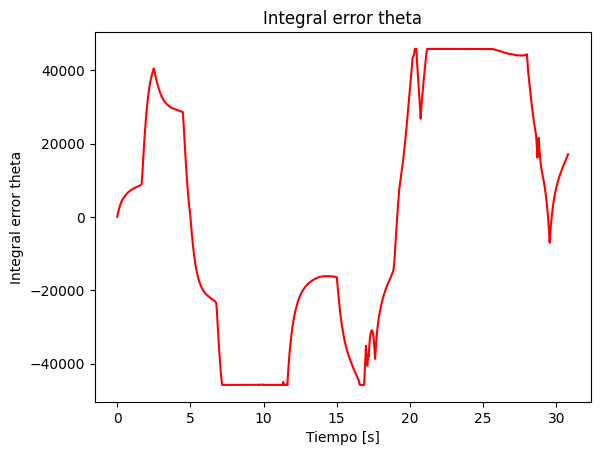

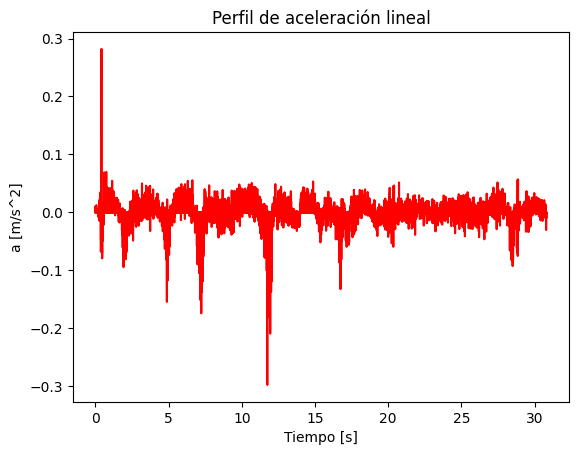

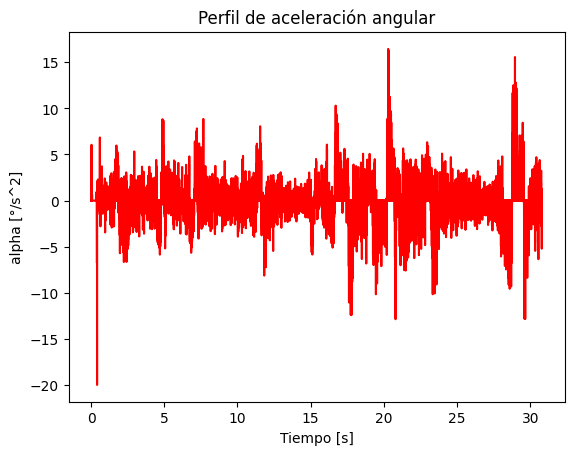

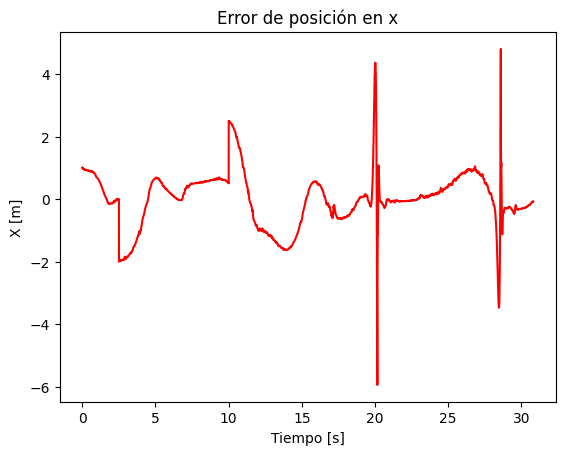

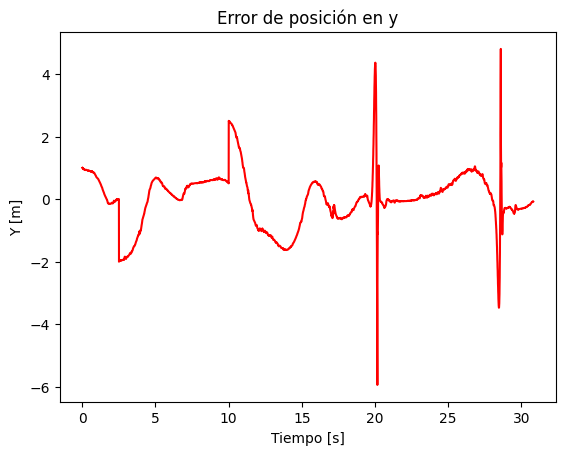

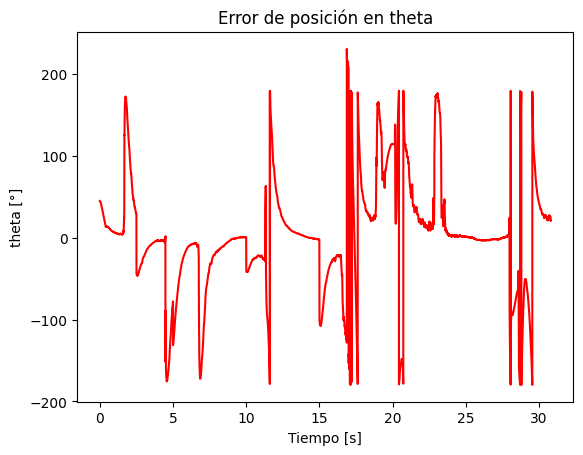

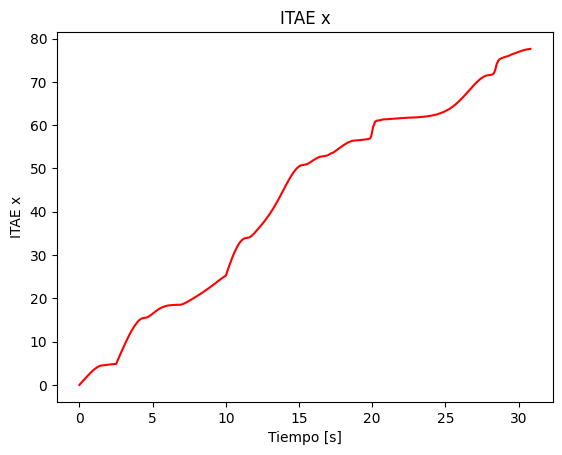

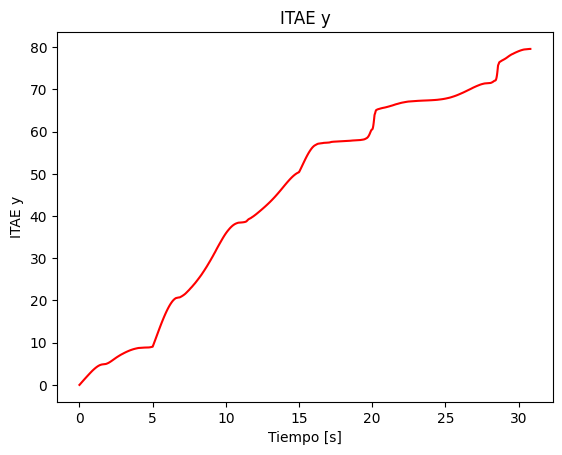

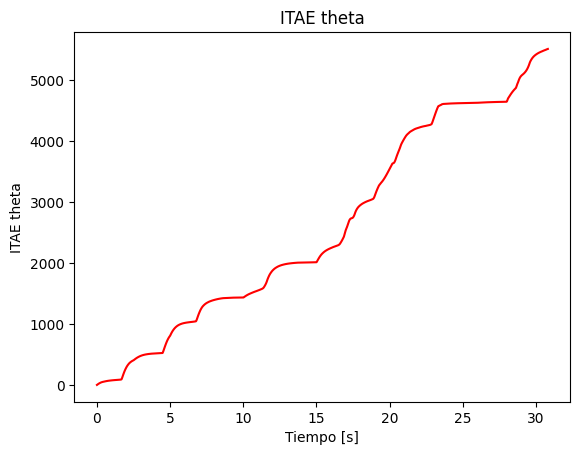

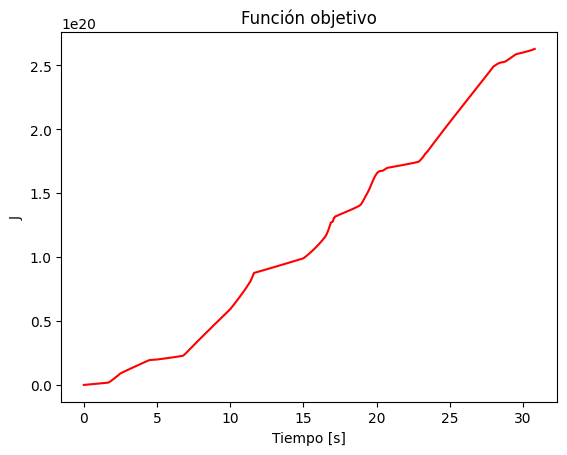

Tiempo de respuesta al 10%: [1.6350000000000011, 1.9699999999999491, 1.7549999999999004, None] segundos
Tiempo de establecimiento al 5%: 30.810000000002017 s


In [27]:
grafico_xy_orientacion(lista_estado_x_lqi, lista_estado_y_lqi, lista_ref_x_lqi, lista_ref_y_lqi)
grafico_torques_entrada(lista_tiempo_lqi, lista_senal_control_lqi)
grafico_estado(lista_tiempo_lqi, lista_estado_lqi, lista_ref_x_lqi, lista_ref_y_lqi, lista_ref_a_lqi)
grafico_aceleracion(lista_tiempo_lqi, lista_estado_lqi)
grafico_error(lista_tiempo_lqi, lista_err_x_lqi, lista_err_x_lqi, lista_err_a_lqi)
grafico_simple(lista_tiempo_lqi, calcular_ITAE_x_lqi, 'Tiempo [s]', 'ITAE x', 'ITAE x')
grafico_simple(lista_tiempo_lqi, calcular_ITAE_y_lqi, 'Tiempo [s]', 'ITAE y', 'ITAE y')
grafico_simple(lista_tiempo_lqi, calcular_ITAE_a_lqi*180/np.pi, 'Tiempo [s]', 'ITAE theta', 'ITAE theta')
grafico_simple(lista_tiempo_lqi, lista_jtime_lqi, 'Tiempo [s]', 'J', 'Función objetivo')
print('Tiempo de respuesta al 10%:', tiempo_respuesta(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, lista_ref_x_lqi, lista_ref_y_lqi, lista_ref_a_lqi, tolerancia=0.05), 'segundos')
print('Tiempo de establecimiento al 5%:', tiempo_establecimiento(lista_tiempo_lqi, lista_err_x_lqi, lista_err_y_lqi, lista_err_a_lqi, tolerancia=0.05))